In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc

In [3]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

In [13]:
# keep only adult cases
df_adult = df.loc[df['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
df_adult_dropped = df_adult.dropna().copy()

In [16]:
df_adult_dropped

,subject_id,hadm_id,icustay_id,icustay_age_group,hospital_expire_flag,icustay_expire_flag,oasis,oasis_prob,age,age_score,...,resprate,resprate_score,temp,temp_score,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score
0,55973,152234,200001,adult,0,0,42,0.305849,61,6,...,32.0,6.0,36.388889,2.0,250.0,10.0,0,0,0,6
1,27513,163557,200003,adult,0,0,35,0.152892,48,3,...,39.0,6.0,36.388889,2.0,3652.0,0.0,1,9,0,6
2,10950,189514,200006,adult,0,0,32,0.109623,54,6,...,27.0,1.0,36.166666,2.0,1955.0,1.0,1,9,0,6
3,20707,129310,200007,adult,0,0,26,0.054187,43,3,...,29.0,1.0,36.388889,2.0,1295.0,5.0,0,0,0,6
4,29904,129607,200009,adult,0,0,25,0.048012,47,3,...,17.5,0.0,34.599998,4.0,1570.0,1.0,1,9,1,0
5,11861,192256,200010,adult,0,0,21,0.029395,27,3,...,23.0,1.0,36.055556,2.0,2050.0,1.0,0,0,0,6
6,93535,121562,200011,adult,0,0,34,0.137099,84,9,...,34.0,6.0,37.277778,2.0,3085.0,0.0,1,9,0,6
7,28448,177527,200012,adult,0,0,25,0.048012,32,3,...,27.0,1.0,37.500000,2.0,1200.0,5.0,0,0,0,6
8,9514,127229,200014,adult,0,0,56,0.724202,84,9,...,33.0,6.0,34.500000,4.0,664.0,10.0,1,9,0,6
9,74032,117458,200016,adult,0,0,17,0.017861,67,6,...,9.0,1.0,35.111111,4.0,1275.0,5.0,0,0,1,0


In [17]:
# create dataframe based on computed scores
df_scores = df_adult_dropped[['oasis_prob','icustay_id', 'age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', 'icustay_expire_flag']].copy()

In [18]:
df_scores

,oasis_prob,icustay_id,age_score,preiculos_score,gcs_score,heartrate_score,meanbp_score,resprate_score,temp_score,urineoutput_score,mechvent_score,electivesurgery_score,icustay_expire_flag
0,0.305849,200001,6,1,3.0,6.0,2.0,6.0,2.0,10.0,0,6,0
1,0.152892,200003,3,3,0.0,3.0,3.0,6.0,2.0,0.0,9,6,0
2,0.109623,200006,6,5,0.0,0.0,2.0,1.0,2.0,1.0,9,6,0
3,0.054187,200007,3,5,0.0,1.0,3.0,1.0,2.0,5.0,0,6,0
4,0.048012,200009,3,5,0.0,1.0,2.0,0.0,4.0,1.0,9,0,0
5,0.029395,200010,3,5,0.0,3.0,0.0,1.0,2.0,1.0,0,6,0
6,0.137099,200011,9,0,0.0,0.0,2.0,6.0,2.0,0.0,9,6,0
7,0.048012,200012,3,5,0.0,3.0,0.0,1.0,2.0,5.0,0,6,0
8,0.724202,200014,9,5,3.0,1.0,3.0,6.0,4.0,10.0,9,6,0
9,0.017861,200016,6,0,0.0,1.0,0.0,1.0,4.0,5.0,0,0,0


Accuracy score: 0.914
AUROC: 0.802
SMR: 1.92
Brier Score: 0.0692
Brier Score [IND]: 0.0681


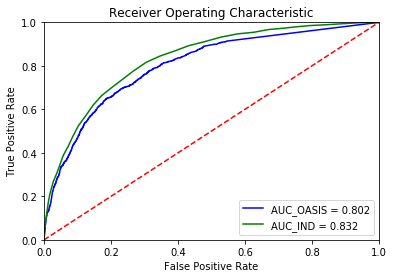

In [39]:
# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
y_test

55724    1
6747     0
12302    0
56722    0
35608    0
38749    0
42866    0
3785     0
43307    0
18961    0
18967    0
54436    1
43678    0
38957    0
48544    0
40668    0
51440    0
44754    1
1870     0
48272    0
38978    0
56425    0
54163    0
17877    0
32423    0
16154    0
33929    0
30635    0
39049    1
14911    0
        ..
34508    0
10725    0
61159    0
27271    0
17494    1
13477    0
51632    0
36736    0
42078    0
8199     0
42225    0
19537    0
33965    0
50936    0
33440    0
51560    0
42987    0
7127     0
14471    0
6501     0
53140    1
6247     0
16651    0
3911     0
31745    0
52974    0
18375    0
57065    0
12673    0
54984    0
Name: icustay_expire_flag, Length: 16100, dtype: int64

In [26]:
y_test.shape

(16100,)

In [28]:
df_scores['oasis_prob'].merge(y_test, how='inner')

AttributeError: 'Series' object has no attribute 'merge'

In [29]:
df_scores['oasis_prob']

0        0.305849
1        0.152892
2        0.109623
3        0.054187
4        0.048012
5        0.029395
6        0.137099
7        0.048012
8        0.724202
9        0.017861
12       0.454600
14       0.279468
17       0.087098
18       0.152892
19       0.209226
20       0.048012
21       0.029395
22       0.042509
23       0.137099
24       0.042509
25       0.423212
27       0.109623
28       0.097783
29       0.033259
30       0.025967
31       0.068843
32       0.054187
36       0.012254
37       0.061106
38       0.087098
           ...   
61493    0.020241
61495    0.033259
61496    0.042509
61497    0.054187
61498    0.048012
61499    0.048012
61500    0.048012
61503    0.068843
61505    0.209226
61506    0.077479
61509    0.305849
61510    0.137099
61512    0.029395
61513    0.109623
61515    0.254529
61516    0.025967
61517    0.077479
61518    0.698023
61519    0.097783
61520    0.020241
61521    0.152892
61522    0.109623
61523    0.054187
61524    0.061106
61525    0

In [32]:
y_ind_prob = df_scores.loc[X_test.index]

In [36]:
len(y_ind_prob['oasis_prob'])

16100

In [37]:
roc_auc_score(y_test, y_ind_prob['oasis_prob'])

0.83201640090585394